# Data preparation

In [1]:
# Import standard libraries
import pickle # For saving and loading serialized objects
from pathlib import Path # Handles file paths and directory creation
import os # Provides OS-related functionalities
# Import data manipulation and visualization libraries
import numpy as np # Numerical computing library
import pandas as pd # Data manipulation library
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # General plotting library
# Import machine learning utilities
from sklearn.model_selection import train_test_split # Splitting data into training and testing sets
# Change the working directory to the parent folder (Jupyter Notebook magic command)
%cd ..
# Import configuration settings
import src.configuration as config # Custom configuration module

/workspaces/Madesh10-aviation_final_project


## 1. Load combined data

In [2]:
# Load the combined dataset from the specified CSV file
data_df=pd.read_csv(config.COMBINED_DATAFILE)
# Display dataset information, including column names, data types, and memory usage
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609575 entries, 0 to 609574
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   origin          609575 non-null  object 
 1   destination     609575 non-null  object 
 2   departure_time  609575 non-null  float64
 3   tail_number     609575 non-null  object 
 4   incident        609575 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 23.3+ MB


## 2. Combine origin/destination to 'route'
### 2.1. Data visualization 

In [3]:
# Display the first few rows of the dataset
# This is useful for a quick overview of the data
# and to check if the data has been loaded correctly
# Display the first 5 rows of the dataset
print(data_df.head())

  origin destination  departure_time tail_number  incident
0    CVG         LGA          1647.0      N914XJ         0
1    CVG         LGA          1719.0      N478PX         0
2    CVG         LGA          1656.0      N917XJ         0
3    CVG         LGA          1650.0      N914XJ         0
4    LGA         CVG          1328.0      N166PQ         0


In [4]:
# Define the list of airport-related features to analyze
airport_features=['origin','destination']
# Print a message indicating the uniqueness analysis
print('Unique levels by feature')

# Display the number of unique values for each airport-related feature
data_df[airport_features].nunique()

Unique levels by feature


origin         5897
destination    5920
dtype: int64

In [5]:
# Display the top 15 most frequent origin airports
print(data_df['origin'].value_counts().head(15))

origin
ATL    26969
DFW    25100
ORD    24927
DEN    24632
CLT    20015
PHX    16015
LAX    15565
LAS    15168
SEA    13608
LGA    13218
MCO    13032
IAH    12971
DCA    12003
EWR    11351
SFO    11126
Name: count, dtype: int64


In [6]:
# Display the top 15 most frequent destination airports
print(data_df['destination'].value_counts().head(15))

destination
ATL    26973
DFW    25096
ORD    24894
DEN    24610
CLT    19988
PHX    16006
LAX    15551
LAS    15169
SEA    13620
LGA    13192
MCO    13014
IAH    12935
DCA    11970
EWR    11329
SFO    11117
Name: count, dtype: int64


### 2.2. Origin Airport 

Saving plot to: ./src/static/1_count_plot.png


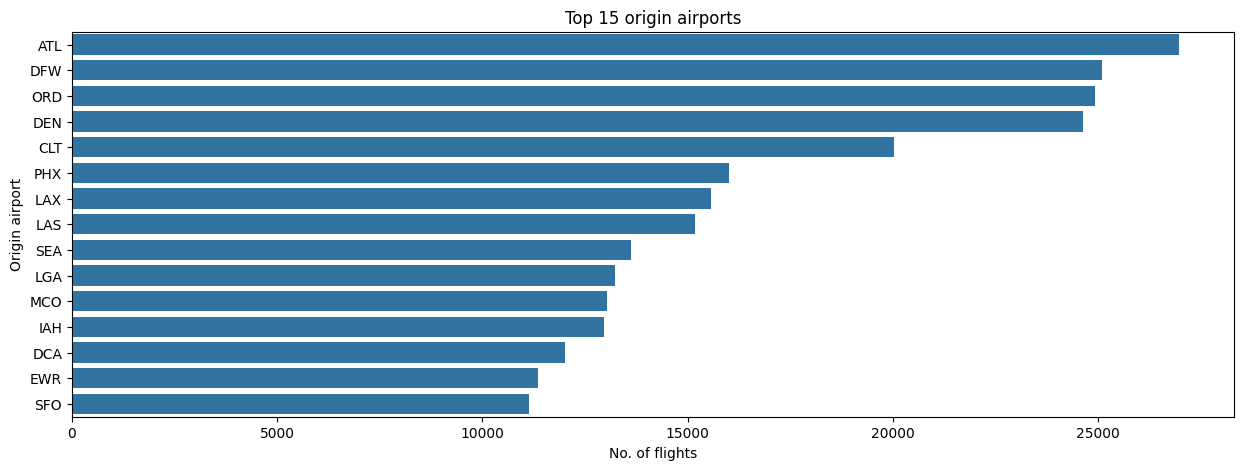

In [7]:
# Plot origin airport level counts
plt.figure(figsize=(15, 5)) # Set figure size for better readability
# Get the top 15 most frequent origin airports
level_counts=data_df['origin'].value_counts().head(15).index
# Create a horizontal count plot for origin airports
sns.countplot(data=data_df, y='origin', order=level_counts)
# Set plot title and labels
plt.title('Top 15 origin airports')
plt.xlabel('No. of flights')
plt.ylabel('Origin airport')

# Ensure the directory exists
output_dir = config.STATIC_APP_ASSETS
# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "1_count_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")
# Print confirmation message
print(f"Saving plot to: {file_path}");

# Display the plot
plt.show()

### 2.3. Destination Airport 

Saving plot to: ./src/static/2_count_plot.png


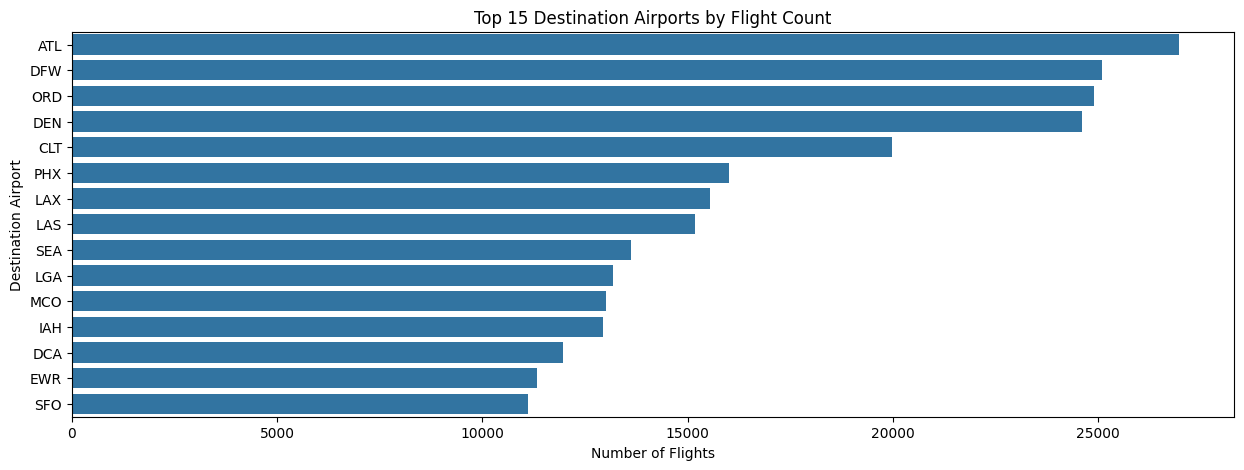

In [8]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Plot destination airport level counts
plt.figure(figsize=(15, 5))  # Set figure size for better readability

# Get the top 15 most frequent destination airports
level_counts = data_df['destination'].value_counts().head(15).index

# Create a horizontal count plot for destination airports
sns.countplot(data=data_df, y='destination', order=level_counts)

# Set plot title and labels
plt.title('Top 15 Destination Airports by Flight Count')
plt.xlabel('Number of Flights')
plt.ylabel('Destination Airport')

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "2_count_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plot
plt.show()

### 2.4. Incident Feature 

In [9]:
# Count the occurrences of each unique value in the 'incident' column
data_df['incident'].value_counts()

incident
0    595162
1     14413
Name: count, dtype: int64

Saving plot to: ./src/static/3_bar_plot.png


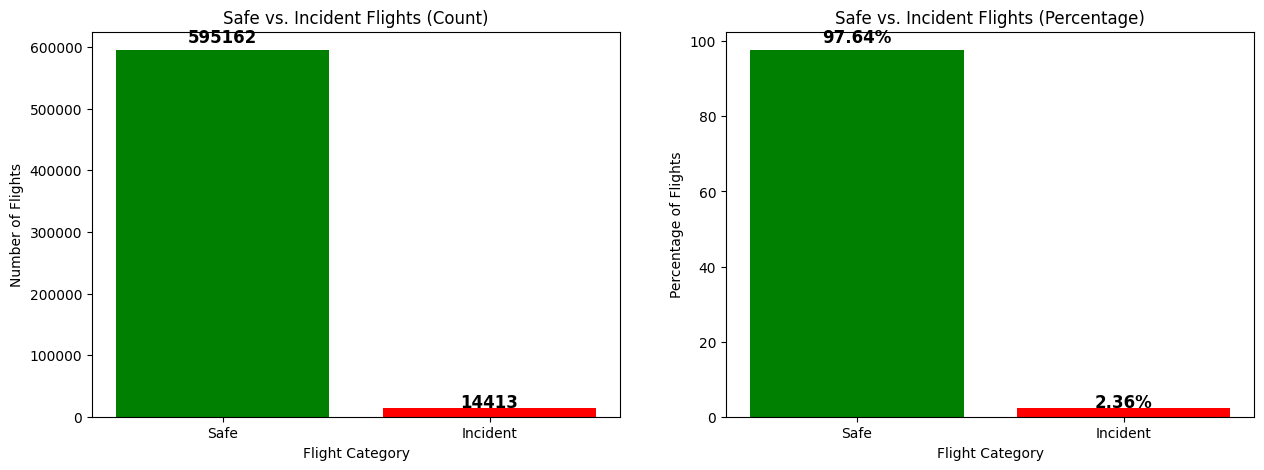

In [10]:
# Count the occurrences of each unique value in the 'incident' column
level_counts = data_df['incident'].value_counts()

# Define labels for the categories (0 = Safe, 1 = Incident)
new_labels = ['Safe', 'Incident']

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# First plot: Raw counts of safe vs. incident flights
axes[0].bar(
    list(range(len(level_counts))),  # X-axis positions
    level_counts,  # Y-axis values
    tick_label=new_labels,  # Labels for bars
    color=('green', 'red')  # Assign colors (green for safe, red for incidents)
)
axes[0].set_title('Safe vs. Incident Flights (Count)')
axes[0].set_xlabel('Flight Category')
axes[0].set_ylabel('Number of Flights')

# Add value labels on top of bars for raw counts
for i, v in enumerate(level_counts):
    axes[0].text(i, v + (v * 0.02), str(v), ha='center', fontsize=12, fontweight='bold')

# Compute percentages
level_counts_percentage = level_counts / level_counts.sum() * 100

# Second plot: Percentage distribution of safe vs. incident flights
axes[1].bar(
    list(range(len(level_counts))),  # X-axis positions
    level_counts_percentage,  # Y-axis values
    tick_label=new_labels,  # Labels for bars
    color=('green', 'red')  # Assign colors (green for safe, red for incidents)
)
axes[1].set_title('Safe vs. Incident Flights (Percentage)')
axes[1].set_xlabel('Flight Category')
axes[1].set_ylabel('Percentage of Flights')

# Add value labels on top of bars for percentages
for i, v in enumerate(level_counts_percentage):
    axes[1].text(i, v + (v * 0.02), f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "3_bar_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plots
plt.show()

In [11]:
# Display the first few rows of the dataset for quick inspection
print(data_df.head())

  origin destination  departure_time tail_number  incident
0    CVG         LGA          1647.0      N914XJ         0
1    CVG         LGA          1719.0      N478PX         0
2    CVG         LGA          1656.0      N917XJ         0
3    CVG         LGA          1650.0      N914XJ         0
4    LGA         CVG          1328.0      N166PQ         0


### 2.5. Route Feature 

In [12]:
# Clean and standardize airport codes by removing leading/trailing spaces and converting to uppercase
data_df['origin'] = data_df['origin'].str.strip().str.upper()  # Standardize origin airport codes
data_df['destination'] = data_df['destination'].str.strip().str.upper()  # Standardize destination airport codes

In [13]:
# Create a new column representing the flight route by combining origin and destination
data_df['route'] = data_df['origin'] + '_' + data_df['destination']

# Display the first few rows of the dataset to verify the new 'route' column
print(data_df.head())

  origin destination  departure_time tail_number  incident    route
0    CVG         LGA          1647.0      N914XJ         0  CVG_LGA
1    CVG         LGA          1719.0      N478PX         0  CVG_LGA
2    CVG         LGA          1656.0      N917XJ         0  CVG_LGA
3    CVG         LGA          1650.0      N914XJ         0  CVG_LGA
4    LGA         CVG          1328.0      N166PQ         0  LGA_CVG


In [14]:
# Filter the dataset to include only flights with reported incidents
incident_df = data_df[data_df['incident'] == 1]

# Display the filtered DataFrame
incident_df

,origin,destination,departure_time,tail_number,incident,route
595162,O69,OQ3,2200.0,N8037W,1,O69_OQ3
595163,OQ3,O70,2230.0,N15EX,1,OQ3_O70
595164,T20,AXH,2100.0,N579RM,1,T20_AXH
595165,PHX,PWA,400.0,N398J,1,PHX_PWA
595166,KFNL,KFNL,2215.0,N24965,1,KFNL_KFNL
...,...,...,...,...,...,...
609570,TRL,OCH,1430.0,N439FJ,1,TRL_OCH
609571,LHD,LHD,2000.0,N1718R,1,LHD_LHD
609572,PVB,PVB,1730.0,N568RD,1,PVB_PVB
609573,PABE,PVT,1830.0,N57617,1,PABE_PVT


Saving plot to: ./src/static/4_count_plot.png


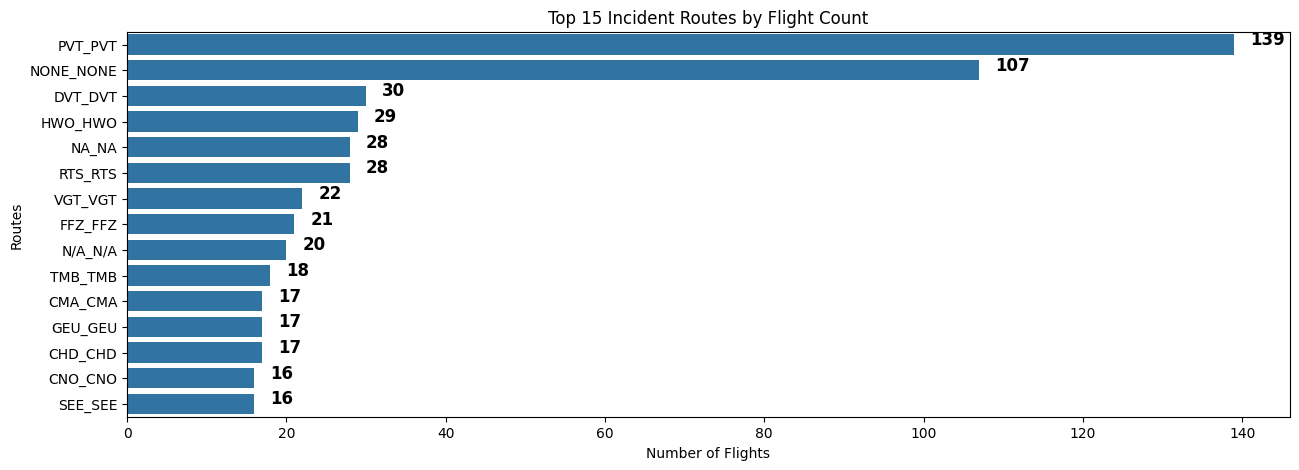

In [15]:
# Plot incident routes
plt.figure(figsize=(15, 5))  # Set figure size for better readability

# Get the top 15 most frequent incident routes
level_counts = incident_df['route'].value_counts().head(15)

# Create a horizontal count plot for incident routes
sns.countplot(data=incident_df, y='route', order=level_counts.index)

# Set plot title and labels
plt.title('Top 15 Incident Routes by Flight Count')
plt.xlabel('Number of Flights')
plt.ylabel('Routes')

# Add value labels on top of bars
for i, v in enumerate(level_counts):
    plt.text(v + 2, i, str(v), ha='left', fontsize=12, fontweight='bold')

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "4_count_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plot
plt.show()

## 3. Encode departure time

In [16]:
# Create a copy of the original dataset to apply cyclical encoding
cyclical_encoded_data_df = data_df.copy()

# Display the first few rows of the copied dataset in transposed format for better readability
cyclical_encoded_data_df.head().T

,0,1,2,3,4
origin,CVG,CVG,CVG,CVG,LGA
destination,LGA,LGA,LGA,LGA,CVG
departure_time,1647.0,1719.0,1656.0,1650.0,1328.0
tail_number,N914XJ,N478PX,N917XJ,N914XJ,N166PQ
incident,0,0,0,0,0
route,CVG_LGA,CVG_LGA,CVG_LGA,CVG_LGA,LGA_CVG


In [17]:
# Function to convert HHMM format to minutes since midnight
def hhmm_to_minutes(hhmm):
    """Convert time in HHMM format to minutes since midnight."""
    hhmm_int = int(hhmm)  # Ensure input is an integer
    hours = hhmm_int // 100  # Extract hours
    minutes = hhmm_int % 100  # Extract minutes
    return hours * 60 + minutes  # Convert to total minutes

# Add minutes since midnight column
cyclical_encoded_data_df['Time'] = cyclical_encoded_data_df['departure_time'].apply(hhmm_to_minutes)

# Add formatted time label for display (HH:MM format)
cyclical_encoded_data_df['time_label'] = cyclical_encoded_data_df['departure_time'].apply(
    lambda x: f"{int(x)//100:02d}:{int(x)%100:02d}"
)

# Apply cyclical encoding - add two new columns
cyclical_encoded_data_df['time_sin'] = np.sin(2 * np.pi * cyclical_encoded_data_df['Time'] / 1440)  # 1440 minutes in a day
cyclical_encoded_data_df['time_cos'] = np.cos(2 * np.pi * cyclical_encoded_data_df['Time'] / 1440)

# Display the DataFrame with the new cyclical encoding columns
print("DataFrame with cyclical time encoding:")
print(cyclical_encoded_data_df.head(3).round(4).T)


DataFrame with cyclical time encoding:
                      0        1        2
origin              CVG      CVG      CVG
destination         LGA      LGA      LGA
departure_time   1647.0   1719.0   1656.0
tail_number      N914XJ   N478PX   N917XJ
incident              0        0        0
route           CVG_LGA  CVG_LGA  CVG_LGA
Time               1007     1039     1016
time_label        16:47    17:19    16:56
time_sin        -0.9497   -0.984  -0.9613
time_cos        -0.3132  -0.1779  -0.2756


### 3.1. Visualization of cyclical encoding 
#### 3.1.1. Sine and cosine vale plot 

Saving plot to: ./src/static/5_scatter_plot.png


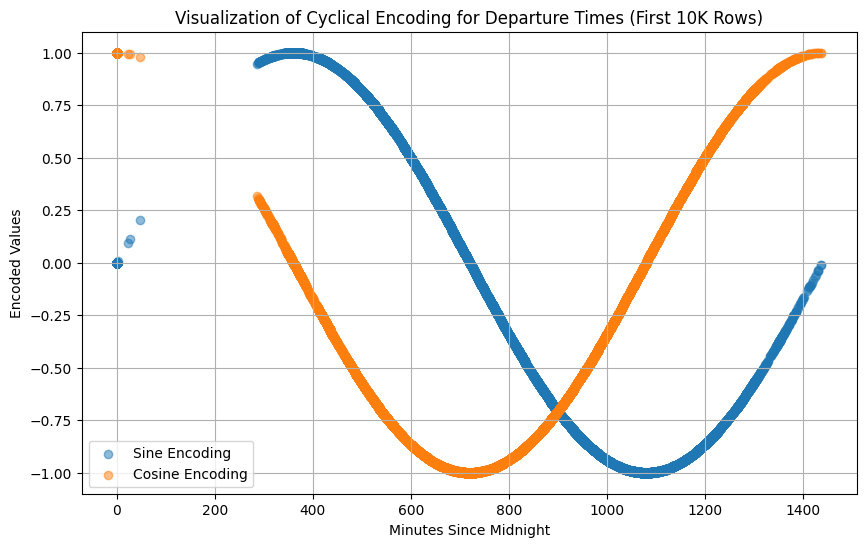

In [18]:
# Filter the DataFrame to only include the first 10K flights
filtered_data = cyclical_encoded_data_df.head(10000)

# Visualization of cyclical encoding
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Plot sine and cosine values to visualize cyclical encoding
plt.scatter(filtered_data['Time'], filtered_data['time_sin'], label='Sine Encoding', marker='o', alpha=0.5)
plt.scatter(filtered_data['Time'], filtered_data['time_cos'], label='Cosine Encoding', marker='o', alpha=0.5)

# Add labels, title, and legend
plt.title("Visualization of Cyclical Encoding for Departure Times (First 10K Rows)")
plt.xlabel("Minutes Since Midnight")
plt.ylabel("Encoded Values")
plt.legend()
plt.grid()

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "5_scatter_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plot
plt.show()

#### 3.1.2. Circular Visualization 

Saving plot to: ./src/static/6_scatter_plot.png


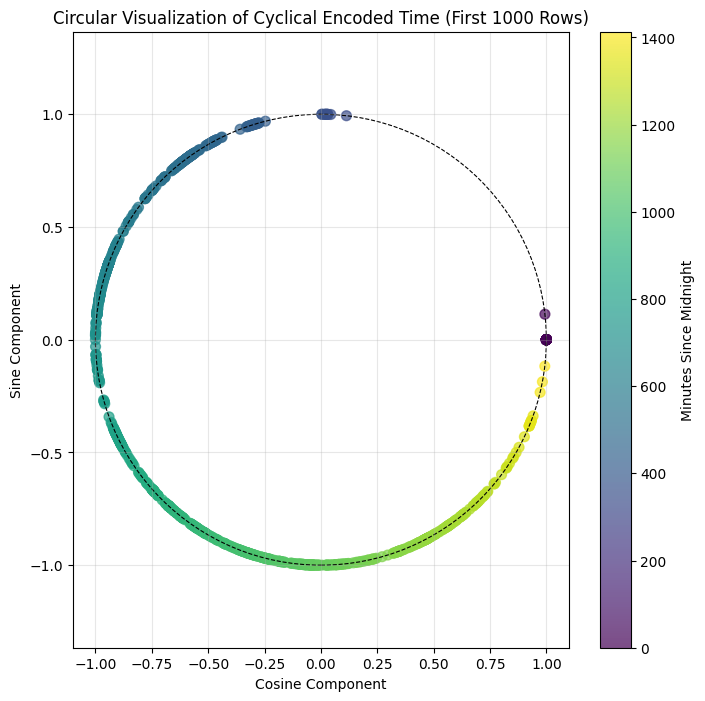

In [19]:
# Filter the DataFrame to only include the first 1000 flights
filtered_data = cyclical_encoded_data_df.head(1000)

# Circular Visualization of Cyclical Encoding
plt.figure(figsize=(8, 8))  # Set figure size for better readability

# Plot the circular points using cosine and sine components
plt.scatter(
    filtered_data['time_cos'], 
    filtered_data['time_sin'], 
    c=filtered_data['Time'], 
    cmap='viridis', 
    s=50,  # Set marker size
    alpha=0.7  # Set transparency for better visibility
)

# Plot a reference circle to visualize cyclical encoding
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=0.8)
plt.gca().add_artist(circle)  # Add the circle to the plot

# Set aspect ratio and labels
plt.gca().set_aspect('equal', adjustable='datalim')  # Ensure equal scaling for circular visualization
plt.title("Circular Visualization of Cyclical Encoded Time (First 1000 Rows)")
plt.xlabel("Cosine Component")
plt.ylabel("Sine Component")
plt.grid(alpha=0.3)  # Add a light grid for reference
plt.colorbar(label="Minutes Since Midnight")  # Add color bar to indicate time

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "6_scatter_plot.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plot
plt.show()

## 4. Clean up features

In [20]:
# Display the first 5 rows of the dataset to inspect cyclical encoding
cyclical_encoded_data_df.head(5)

,origin,destination,departure_time,tail_number,incident,route,Time,time_label,time_sin,time_cos
0,CVG,LGA,1647.0,N914XJ,0,CVG_LGA,1007,16:47,-0.949699,-0.313164
1,CVG,LGA,1719.0,N478PX,0,CVG_LGA,1039,17:19,-0.984041,-0.177944
2,CVG,LGA,1656.0,N917XJ,0,CVG_LGA,1016,16:56,-0.961262,-0.275637
3,CVG,LGA,1650.0,N914XJ,0,CVG_LGA,1010,16:50,-0.953717,-0.300706
4,LGA,CVG,1328.0,N166PQ,0,LGA_CVG,808,13:28,-0.374607,-0.927184


In [21]:
# Drop unnecessary columns to retain only relevant cyclical encoding features
cyclical_encoded_data_df.drop(
    columns=['origin', 'destination', 'departure_time', 'tail_number', 'Time', 'time_label'], 
    inplace=True
)

# Display the first 5 rows of the modified dataset to verify column removal
cyclical_encoded_data_df.head(5)

,incident,route,time_sin,time_cos
0,0,CVG_LGA,-0.949699,-0.313164
1,0,CVG_LGA,-0.984041,-0.177944
2,0,CVG_LGA,-0.961262,-0.275637
3,0,CVG_LGA,-0.953717,-0.300706
4,0,LGA_CVG,-0.374607,-0.927184


## 5. Encode Route 

In [22]:
# Perform frequency encoding for the 'route' column
# This replaces each route with its occurrence count in the dataset
route_frequency = cyclical_encoded_data_df['route'].value_counts()

# Map the frequency values to the 'route' column and create a new encoded column
cyclical_encoded_data_df['route_encoded'] = cyclical_encoded_data_df['route'].map(route_frequency)

# Drop the original 'route' column as it's now encoded
cyclical_encoded_data_df.drop(columns=['route'], inplace=True)

# Display the updated dataset with frequency-encoded features
print("DataFrame with frequency-encoded features:")
print(cyclical_encoded_data_df.head(5).T)  # Transposed for better readability

DataFrame with frequency-encoded features:
                        0           1           2           3           4
incident         0.000000    0.000000    0.000000    0.000000    0.000000
time_sin        -0.949699   -0.984041   -0.961262   -0.953717   -0.374607
time_cos        -0.313164   -0.177944   -0.275637   -0.300706   -0.927184
route_encoded  203.000000  203.000000  203.000000  203.000000  206.000000


In [23]:
# Create a copy of the cyclical encoded dataset to preserve the original data
data_df = cyclical_encoded_data_df.copy()

# Display the first 5 rows of the copied dataset in transposed format for better readability
data_df.head(5).T

,0,1,2,3,4
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,-0.949699,-0.984041,-0.961262,-0.953717,-0.374607
time_cos,-0.313164,-0.177944,-0.275637,-0.300706,-0.927184
route_encoded,203.000000,203.000000,203.000000,203.000000,206.000000


Saving plot to: ./src/static/7_heat_map.png


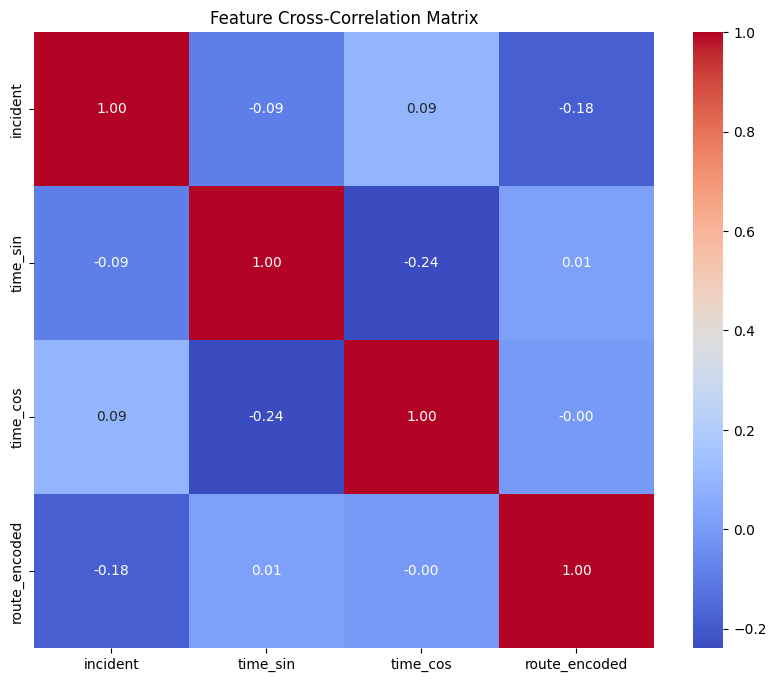

In [24]:
# Compute the cross-correlation matrix for numerical features
corr_matrix = data_df.corr()

# Create a heatmap to visualize feature correlations
plt.figure(figsize=(10, 8))  # Set figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Use 'coolwarm' colormap for contrast

# Set plot title
plt.title('Feature Cross-Correlation Matrix')

# Ensure the output directory exists
output_dir = config.STATIC_APP_ASSETS
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Construct the full file path for saving the plot
file_path = os.path.join(output_dir, "7_heat_map.png")

# Save the figure as a PNG file with tight bounding box
plt.savefig(file_path, format="png", bbox_inches="tight")

# Print confirmation message
print(f"Saving plot to: {file_path}")

# Display the plot
plt.show()

## 6. Train-Test split

In [25]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(
    data_df,  # Dataset to split
    test_size=0.25,  # Allocate 25% of the data for testing
    random_state=315  # Set random seed for reproducibility
)

In [26]:
# Display the first 5 rows of the training dataset in transposed format for better readability
train_df.head(5).T

,91449,453534,330702,505130,229956
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,0.963630,-0.969231,0.771625,0.819152,-0.930418
time_cos,-0.267238,-0.246153,-0.636078,-0.573576,0.366501
route_encoded,385.000000,709.000000,31.000000,381.000000,10.000000


In [27]:
# Reset the index of the training dataset and drop the old index
train_df.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the training dataset in transposed format for better readability
train_df.head(5).T

,0,1,2,3,4
incident,0.000000,0.000000,0.000000,0.000000,0.000000
time_sin,0.963630,-0.969231,0.771625,0.819152,-0.930418
time_cos,-0.267238,-0.246153,-0.636078,-0.573576,0.366501
route_encoded,385.000000,709.000000,31.000000,381.000000,10.000000


In [28]:
# Reset the index of the test dataset and drop the old index
test_df.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the test dataset in transposed format for better readability
test_df.head(5).T

,0,1,2,3,4
incident,0.0,0.000000,0.000000,0.000000,0.000000
time_sin,0.0,-0.406737,-0.801254,-0.998392,-0.622515
time_cos,1.0,0.913545,0.598325,-0.056693,-0.782608
route_encoded,85.0,32.000000,421.000000,30.000000,553.000000


## 7. Save

In [29]:
# Ensure the processed data directory exists, creating it if necessary
Path(config.PROCESSED_DATA_DIRECTORY).mkdir(exist_ok=True)

# Save the full dataset to a CSV file
data_df.to_csv(config.ENCODED_DATAFILE, index=False)

# Save the training dataset to a CSV file
train_df.to_csv(config.TRAINING_DATAFILE, index=False)

# Save the testing dataset to a CSV file
test_df.to_csv(config.TESTING_DATAFILE, index=False)
# Verify that the files have been saved correctly
print(f"Encoded data saved to: {config.ENCODED_DATAFILE}")
print(f"Training data saved to: {config.TRAINING_DATAFILE}")
print(f"Testing data saved to: {config.TESTING_DATAFILE}")


Encoded data saved to: ./data/processed/all_encoded.csv
Training data saved to: ./data/processed/train_encoded.csv
Testing data saved to: ./data/processed/test_encoded.csv
